## Нелинейные алгебраические уравнения и системы
### Метод простой итерации. Метод Ньютона


Цыбулин Иван ([tsybulin@crec.mipt.ru](mailto:tsybulin@crec.mipt.ru))

## Особенности нелинейных уравнений
В отличие от линейного уравнения (и невырожденных линейных систем), нелиейное уравнение вида
$$
f(x) = 0
$$
может иметь сколько угодно решений, в том числе и вовсе их не иметь.

Для корректной постановки требуется локализовать корень, например так
$$
a < x < b
$$

## Метод дихотомии
Простейший метод решения скалярного уравнения &mdash; метод деления отрезка пополам. Допустим, что функция $f(x)$ непрерывна и в концах отрезка $[a,b]$ принимает значения разного знака. Вычислим функцию в середине отрезка $c = \frac{a+b}{2}$. Если $f(c)$ того же знака, что и $f(a)$, тогда корень расположен на отрезке $[c, b]$. В противном случае, корень расположен на отрезке $[a, c]$

<img src="bisect.png" width="600">

Процедура деления отрезка снова применяется к новому интервалу. Итерации заканчиваются, когда очередной отрезок $[a_k, b_k]$ становится достаточно мал: $b_k - a_k < \epsilon$

In [4]:
import numpy as np
def bisect(f, a, b, eps=1e-6):
    fa = f(a); fb = f(b)
    while b - a > eps:
        c = (a + b) / 2
        fc = f(c)
        if fa * fc > 0: # If sign f(a) = sign f(c)
            a = c; fa = fc
        else:
            b = c; fb = fc
        print('[%12.10f, %12.10f]' % (a, b))
    return (a + b) / 2

def f(x): return np.tan(x / 4) - 1
bisect(f, 3, 4) - np.pi

[3.0000000000, 3.5000000000]
[3.0000000000, 3.2500000000]
[3.1250000000, 3.2500000000]
[3.1250000000, 3.1875000000]
[3.1250000000, 3.1562500000]
[3.1406250000, 3.1562500000]
[3.1406250000, 3.1484375000]
[3.1406250000, 3.1445312500]
[3.1406250000, 3.1425781250]
[3.1406250000, 3.1416015625]
[3.1411132812, 3.1416015625]
[3.1413574219, 3.1416015625]
[3.1414794922, 3.1416015625]
[3.1415405273, 3.1416015625]
[3.1415710449, 3.1416015625]
[3.1415863037, 3.1416015625]
[3.1415863037, 3.1415939331]
[3.1415901184, 3.1415939331]
[3.1415920258, 3.1415939331]
[3.1415920258, 3.1415929794]


-1.5099579897537296e-07

Метод дихотомии на каждой итерации делит отрезок пополам, следовательно
$$
\left|x^* - \frac{a_k + b_k}{2}\right| \leqslant \frac{b_k - a_k}{2} = \left(\frac{1}{2}\right)^k \frac{b_0 - a_0}{2}.
$$
Видно, что метод сходится со скоростью $q = \frac{1}{2}$.

## Метод простой итерации
Рассмотрим следующий (одношаговый) итерационный метод
$$
x_{k+1} = \varphi(x_k)
$$

Пусть этот процесс сходится $x_k \to x^*$. Что можно сказать про $x^*$?

$$
x^* = \varphi(x^*)
$$

## Сходимость метода простой итерации
**Теорема Банаха**. Если $\varphi(x)$ задает на отрезке $[a, b]$ сжимающее отображение, то есть отображает отрезок в себя $\varphi([a, b]) \subseteq [a,b]$ и уменьшает расстояния между любой парой точек
$$
|\varphi(x) - \varphi(y)| \leqslant q |x-y|,\quad \forall x,y \in [a,b],
$$
где $q < 1$, то у такого отображения на отрезке $[a,b]$ есть единственная неподвижная точка $x^* = \varphi(x^*)$ и последовательность $x_{k+1} = \varphi(x_k)$ сходится к ней при любом $x_0 \in [a,b]$.

Если $\varphi(x)$ &mdash; сжимающее отображение, то
$$
|x_{k+1} - x^*| \leqslant q|x_k - x^*| \leqslant \cdots \leqslant q^{k+1} |x_0 - x^*|
$$
То есть итерационный процесс сходится со скоростью $q$.

## Достаточное условие сжимаемости
 * Функция $\varphi(x)$ отображает отрезок в себя (важное условие!): $ \varphi(x) \in [a,b], \quad \forall x \in [a,b] $
 * Производная $\varphi'(x)$ по модулю меньше единицы на $[a,b]$:
 $$
 q = \max_{x\in [a,b]} |f'(x)|
 $$
 
Если $|\varphi'(x^*)| < 1$, то существует такая окрестность корня $[x_0 - \epsilon, x_0 + \epsilon]$, где $\varphi(x)$ задает сжимающее отображение. При необходимости можно измельчать отрезок $[a,b]$ дихотомией до выполнения первого условия.

Рассмотрим уравнение 
$$
x = \ln(x+2)
$$

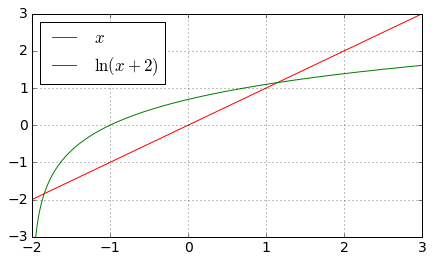

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', **{'size' : 14})
x = np.linspace(-2. + 0.001, 3, 1000);
plt.figure(figsize=(7,4))
plt.plot(x, x, 'r', label='$x$');
plt.plot(x, np.log(x + 2), 'g', label='$\ln(x+2)$');
plt.grid()
plt.legend(loc='upper left')
plt.ylim(-3, 3)
plt.show()

Из графиков видно, что один корень расположен в на отрезке $[1, 2]$, а второй &mdash; на отрезке $[-1.9, -1]$. Действительно,
$$\begin{aligned}
x - \ln(x+2)\big|_{x = 1} &= 1 - \ln 3 < 1 - \ln e = 0\\
x - \ln(x+2)\big|_{x = 2} &= 2 - \ln 4 > 2 - \ln e^2 = 0\\
x - \ln(x+2)\big|_{x = -1.9} &= -1.9 - \ln 0.1 > -1.9 - \ln e^{-2} = 0.1 > 0\\
x - \ln(x+2)\big|_{x = -1} &= -1 - \ln 1 = -1 < 0
\end{aligned}
$$

Возьмем итерационный процесс $x_{k+1} = \varphi(x_k)$, где $\varphi(x) = \ln(x+2)$. Это отображение переводит отрезок $[1, 2]$ внутрь себя:
$$
1 < \ln 3 \leqslant \ln(x + 2) \leqslant \ln 4 < 2.
$$
Производная этого отображения равна
$$
\varphi'(x) = \frac{1}{x+2}, \qquad q = \max_{x\in[1,2]}|\varphi'(x)| = \frac{1}{3} < 1.
$$
Значит, $\varphi(x)$ &mdash; сжимающее отображение на $[1,2]$. 

In [6]:
from scipy.optimize import fsolve

def phi(x):
    return np.log(x + 2)

x = 1.5
for i in range(10):
    x = phi(x)
    
[xtrue] = fsolve(lambda x: x - phi(x), 1.5, xtol=1e-20)
print('x =', x, ', x* =', xtrue)
print('x - x* =', x - xtrue)

x = 1.1461966638 , x* = 1.14619322062
x - x* = 3.4431762046e-06


Попробуем применить то же отображение, но к другому корню $x \approx -1.84141$

In [7]:
x0 = -1.84140
x = x0
for i in range(10):
    x = phi(x)
    
[xtrue] = fsolve(lambda x: x - phi(x), x0, xtol=1e-20)
print('x =', x, ', x* =', xtrue)
print('x - x* =', x - xtrue)

x = 1.02413690972 , x* = -1.84140566044
x - x* = 2.86554257015


Дело в том, что $\varphi(x) = \log(x+2)$ не задает сжимающее отображение на $[-1.9, -1]$, это видно хотя бы из того, что
$$
|\varphi'(x)| = \left|\frac{1}{x+2} \right| \geqslant 1
$$

Предложите другой способ записать решение уравнения $x = \ln(x+2)$
в виде неподвижной точки некоторого итерационного процесса $x_{k+1} = \tilde\varphi(x_k)$
$$
x = \tilde\varphi(x)
$$

Рассмотрим $\tilde \varphi(x) = e^x - 2$. Это отображение переводит отрезок $[-1.9, -1]$ в себя:
$$
-1.9 < -1.85 \lesssim e^{-1.9} - 2 < e^x - 2 < \frac{1}{e} - 2 < -1,
$$
а его производная
$$
\tilde\varphi'(x) = e^x, \qquad q = \max_{x \in [-1.9, -1]} |e^x| = \frac{1}{e} \approx 0.3679
$$

In [8]:
def phi2(x):
    return np.exp(x) - 2

x0 = -1.45
x = x0
for i in range(10):
    x = phi2(x)
    
[xtrue] = fsolve(lambda x: x - phi2(x), x0, xtol=1e-20)
print('x =', x, ', x* =', xtrue)
print('x - x* =', x - xtrue)

x = -1.84140565539 , x* = -1.84140566044
x - x* = 5.04783015387e-09


## Метод Ньютона
Рассмотрим уравнение $f(x) = 0$. Пусть нам известно приближение к решению $x_k \approx x^*$. *Линеаризуем* функцию $f(x)$ в окрестности $x = x_k$:
$$
f(x) \approx f(x_k) + f'(x_k) (x - x_k).
$$
Вместо $f(x_{k+1}) = 0$ решим линеаризованное уравнение $f(x_k) + f'(x_k) (x_{k+1} - x_k) = 0$:
$$
x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}.
$$

Запишем метод Ньютона в виде метода простой итерации
$$
\varphi(x) = x - \frac{f(x)}{f'(x)}, \qquad
\varphi'(x) = 1 - \frac{f'(x)}{f'(x)} + \frac{f(x) f''(x)}{(f'(x))^2} = \frac{f(x) f''(x)}{(f'(x))^2}
$$
Видно, что в окрестности корня $f(x) = 0$ производная $\varphi'(x)$ по модулю будет меньше единицы.

На самом деле, верна следующая теорема: если точка $x_k$ *достаточно близка* к $x^*$, то
$$
|x_{k+1} - x^*| \leqslant C |x_{k} - x^*|^\color{red}{2} \leqslant 
C \left(C |x_{k-1} - x^*|^2\right)^2 = 
C^3 |x_{k-1} - x^*|^4
\leqslant 
\cdots \leqslant C^{2^{k+1}-1} |x_0 - x^*|^\color{red}{2^{k+1}}.
$$
Говорят, что метод Ньютона сходится *квадратично*.

Грубо говоря, $k$ итераций метода Ньютона так же эффективны, как $2^k$ итераций метода с постоянным $q$.

In [9]:
def f(x):
    return np.tan(x / 4) - 1
def fprime(x):
    return 0.25 / np.cos(x / 4)**2

x = 1.
for i in range(1, 7):
    x = x - f(x) / fprime(x)
    print('x_%d - x^* = %e' % (i, x - np.pi))

x_1 - x^* = 6.547214e-01
x_2 - x^* = 1.178428e-01
x_3 - x^* = 3.538901e-03
x_4 - x^* = 3.132800e-06
x_5 - x^* = 2.453593e-12
x_6 - x^* = 0.000000e+00


Метод Ньютона нуждается в хорошем начальном приближении. Если начальное приближение задано неудачно, метод разойдется (причем тоже квадратично &mdash; ошибка будет на каждой итерации возводиться в квадрат). Метод также допускает наглядную интерпретацию:

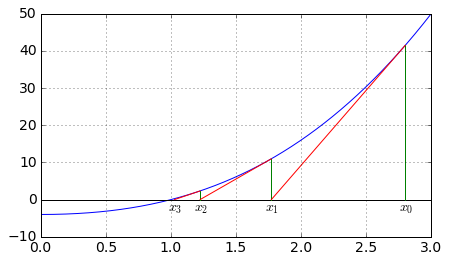

In [10]:
def f(x):
    return (x-1)*(x+2)**2
def fprime(x):
    return 3 * x * (x+2)

x0 = 2.8
x = [x0]
n = 3
for i in range(n):
    x.append(x[-1] - f(x[-1]) / fprime(x[-1]))
    
X = np.linspace(0, 3, 1000)
plt.figure(figsize=(7, 4))
plt.plot(X, f(X), 'b')
plt.plot(X, 0*X, 'k')
for i in range(n):
    plt.plot([x[i], x[i]], [0, f(x[i])], 'g')
for i in range(n+1):    
    plt.annotate('$x_{%d}$' % i, xy=(x[i]-0.05, -3))
for i in range(n):
    plt.plot([x[i], x[i+1]], [f(x[i]), 0], 'r')

plt.grid()

Если корень функции кратный, метод Ньютона метод Ньютона сходится медленее (линейно, а не квадратично)

In [11]:
def f(x):
    return (x-1)**2 * (x+2)
def fprime(x):
    return 3 * (x**2 - 1)

x = 3.
for i in range(1, 10):
    x = x - f(x) / fprime(x)
    print('x_%d - x^* = %e' % (i, x - 1))

x_1 - x^* = 1.166667e+00
x_2 - x^* = 6.549708e-01
x_3 - x^* = 3.544152e-01
x_4 - x^* = 1.860994e-01
x_5 - x^* = 9.569009e-02
x_6 - x^* = 4.857325e-02
x_7 - x^* = 2.447858e-02
x_8 - x^* = 1.228862e-02
x_9 - x^* = 6.156817e-03


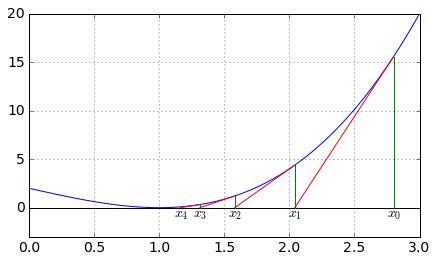

In [12]:
def f(x):
    return (x-1)**2 * (x+2)
def fprime(x):
    return 3 * (x**2 - 1)

x0 = 2.8
x = [x0]
n = 4
for i in range(n):
    x.append(x[-1] - f(x[-1]) / fprime(x[-1]))
    
X = np.linspace(0, 3, 1000)
plt.figure(figsize=(7, 4))
plt.plot(X, f(X), 'b')
plt.plot(X, 0*X, 'k')
for i in range(n):
    plt.plot([x[i], x[i]], [0, f(x[i])], 'g')
for i in range(n+1):    
    plt.annotate('$x_{%d}$' % i, xy=(x[i]-0.05, -1))
for i in range(n):
    plt.plot([x[i], x[i+1]], [f(x[i]), 0], 'r')
plt.ylim(-3, 20)

plt.grid()

### Системы уравнений
Будем рассматривать системы алгебраических уравнений
$$
\mathbf f(\mathbf x) = \mathbf 0,
$$
в которых число неизвестных равно числу уравнений.

### Сжиамющие отображения
Аналогично одномерному случаю, отображение $\boldsymbol \varphi$ называется сжимающим в области $G$, если
* Отображает область в себя: $\boldsymbol \varphi(\mathbf  x) \in G, \; \forall \mathbf x \in G$
* Уменьшает расстояния: существует такое $q < 1$, что
$$
\|\boldsymbol \varphi(\mathbf y) - \boldsymbol \varphi(\mathbf  x)\| \leqslant
q \|\mathbf y - \mathbf x\|, \; \forall \mathbf x, \mathbf y \in G.
$$

В этом случае $\mathbf x_{n+1} = \boldsymbol \varphi(\mathbf x_n)$ сходится к неподвижной точке при любом $\mathbf x_0 \in G$

### Достаточное условие сжимаемости
Для того, чтобы $\boldsymbol \varphi$ задавала сжимающее отображение в $G$ достаточно, чтобы $\boldsymbol \varphi$
* Отображала область в себя: $\boldsymbol \varphi(\mathbf  x) \in G, \; \forall \mathbf x \in G$
* Имела норму матрицы Якоби меньше единицы:
$$
q = \max_{\mathbf x \in G} \left\|\frac{\partial \boldsymbol \varphi}{\partial \mathbf x}(\mathbf x)\right\| < 1
$$
Как и для линейных систем, для сходимости достаточно найти хотя бы одну такую норму.

### Пример

Рассмотрим систему уравнений
$$
\begin{cases}
x - \cos y = 0\\
\sin x - y = 0
\end{cases}
$$
Необходимо найти корень в области $0 < x < 1,\; 0 < y < 1$.

Для наглядности изобразим каждое уравнение в виде графика.

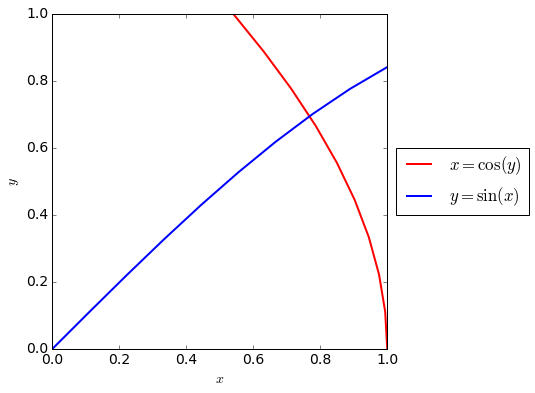

In [27]:
t = np.linspace(0, 1, 10)
plt.figure(figsize=(8, 6))
plt.plot(np.cos(t), t, 'r', label='$x = \cos(y)$', lw=2)
plt.plot(t, np.sin(t), 'b', label='$y = \sin(x)$', lw=2)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.axis('square')
plt.show()

Решение исходной системы является неподвижной точкой для следующего итерационного процесса
$$
\begin{pmatrix}
x_{k+1}\\y_{k+1}
\end{pmatrix} = 
\begin{pmatrix}
\cos y_k\\\sin x_k
\end{pmatrix},
$$
задаваемого вектор-функцией
$$
\boldsymbol\varphi\begin{pmatrix}
x\\y
\end{pmatrix} = 
\begin{pmatrix}
\cos y\\\sin x
\end{pmatrix}
$$
Изучим его сходимость

Нетрудно видеть, что точка из $G = \{0 \leqslant x \leqslant 1, \; 0 \leqslant y \leqslant 1\}$ отображается снова в $G$:
$$
1 \geqslant \varphi_1(x, y) = \cos y \geqslant \cos 1 > 0\\
0 \leqslant \varphi_2(x, y) = \sin x \leqslant \sin 1 < 1
$$

Значит $\boldsymbol\varphi(G) \subseteq G$

Проверим матрицу Якоби:
$$
\mathbf B(\mathbf x) = \frac{\partial \boldsymbol \varphi}{\partial \mathbf x} = 
\begin{pmatrix}
0 & -\sin y\\
\cos x & 0
\end{pmatrix}
$$

Ее $\infty$ и $\ell_1$ нормы совпадают и равны соответственно
$$
\|\mathbf B(\mathbf x)\|_{\infty} = \max(|\cos x|, |\sin y|).
$$
Однако, величина $q = \max_{\mathbf x \in G} \|\mathbf B(\mathbf x)\|_{\infty} = 1 \not < 1.$ Гарантировать сжимаемость мы не можем

Выясним, из-за чего $q$ получилось равным $1$. Дело в линии $x = 0$, на ней $\cos x = 1$. Необходимо исключить эту линию из области $G$ вместе с некоторой окрестностью. Пусть
$$
G' = \{a \leqslant x \leqslant 1, \; 0 \leqslant y \leqslant 1\}, \quad a > 0
$$
При этом в $G'$
$$
q' = \max_{\mathbf x \in G'} \|\mathbf B(\mathbf x)\|_\infty = \max(\cos a, \sin 1) < 1.
$$
Осталось только выбрать такое $a$, чтобы не нарушить свойство $\boldsymbol\varphi(G') \subseteq G'$.

В уменьшенной области
$$
G' = \{a \leqslant x \leqslant 1, \; 0 \leqslant y \leqslant 1\}, \quad a > 0
$$
условие $\varphi(G') \subseteq G'$ соответствует
$$
1 \geqslant \varphi_1(x, y) = \cos y \color{red}{\geqslant} a\\
0 < \sin a \leqslant \varphi_2(x, y) = \sin x \leqslant \sin 1 < 1.
$$
Условие $\cos y \geqslant a$ может нарушаться, если выбрать слишком большое $a$. Возьмем $a = \cos 1$ &mdash; предельно возможное значение $\cos y$.

Итак, в области
$$
G' = \{\cos 1 \leqslant x \leqslant 1, \; 0 \leqslant y \leqslant 1\} \approx
\{0.5403 \leqslant x \leqslant 1, \; 0 \leqslant y \leqslant 1\}
$$
функция $\boldsymbol \varphi(x, y) = (\cos y, \sin x)$ задает сжимающее отображение с 
$$
q = \max(\cos \cos 1, \sin 1) \approx 0.8576
$$

In [38]:
def phi(x, y):
    return np.cos(y), np.sin(x)

x, y = 0.8, 0.8
for i in range(1, 91):
    x, y = phi(x, y)
    if i % 10 == 0: print('it =', i, 'x =', x, 'y =', y)

it = 10 x = 0.767511630584 y = 0.692510335887
it = 20 x = 0.768182766819 y = 0.694867420509
it = 30 x = 0.768168875029 y = 0.694818702769
it = 40 x = 0.768169162568 y = 0.69481971118
it = 50 x = 0.768169156616 y = 0.694819690308
it = 60 x = 0.768169156739 y = 0.69481969074
it = 70 x = 0.768169156737 y = 0.694819690731
it = 80 x = 0.768169156737 y = 0.694819690731
it = 90 x = 0.768169156737 y = 0.694819690731


### Метод Ньютона для систем
Пусть имеется приближение $\mathbf x_k$ к решеннию системы $\mathbf f(\mathbf x) = \mathbf 0$. Точно так же, как в случае скалярного уравнения, заменим уравнение приближенным линейным
$$
0 = \mathbf f(\mathbf x) = \mathbf f(\mathbf x_k) + \frac{\partial \mathbf f}{\partial \mathbf x}(\mathbf x_k)(\mathbf x - \mathbf x_k) + O\big((\mathbf x - \mathbf x_k)^2\big) \approx \mathbf f(\mathbf x_k) + \frac{\partial \mathbf f}{\partial \mathbf x}(\mathbf x_k)(\mathbf x - \mathbf x_k)
$$
Решение системы линейных уравнений принимаем в качестве нового приближения
$$
\frac{\partial \mathbf f}{\partial \mathbf x}(\mathbf x_k)(\mathbf x_{k+1} - \mathbf x_k) = -\mathbf f(\mathbf x_k)
\mathbf x_{k+1} = \mathbf x_k - \left[\frac{\partial \mathbf f}{\partial \mathbf x}(\mathbf x_k)
\right]^{-1} \mathbf f(\mathbf x_k)
$$

In [53]:
def f(xy):
    x, y = xy
    return np.array([x - np.cos(y), y - np.sin(x)])
def jacf(xy):
    x, y = xy
    return np.array([[1, np.sin(y)], [-np.cos(x), 1]])

xy = np.array([0.5, 0.5])
for _ in range(5):
    dxy = np.linalg.solve(jacf(xy), f(xy))
    xy -= dxy
    print('x = %.14f y = %.14f' % tuple(xy), 'dx = % 6.2e dy = % 6.2e' % tuple(dxy))

x = 0.77270838674620 y = 0.71874966329392 dx = -2.73e-01 dy = -2.19e-01
x = 0.76831340773161 y = 0.69493015833692 dx =  4.39e-03 dy =  2.38e-02
x = 0.76816915677603 y = 0.69481969798874 dx =  1.44e-04 dy =  1.10e-04
x = 0.76816915673680 y = 0.69481969073079 dx =  3.92e-11 dy =  7.26e-09
x = 0.76816915673680 y = 0.69481969073079 dx = -4.87e-17 dy =  7.60e-17
